In [1]:
#%matplotlib qt
%load_ext zipline

In [2]:
#%matplotlib qt

Entering Forex bundle.  tuSymbols= ('EURUSD1',)
about to return ingest function


/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


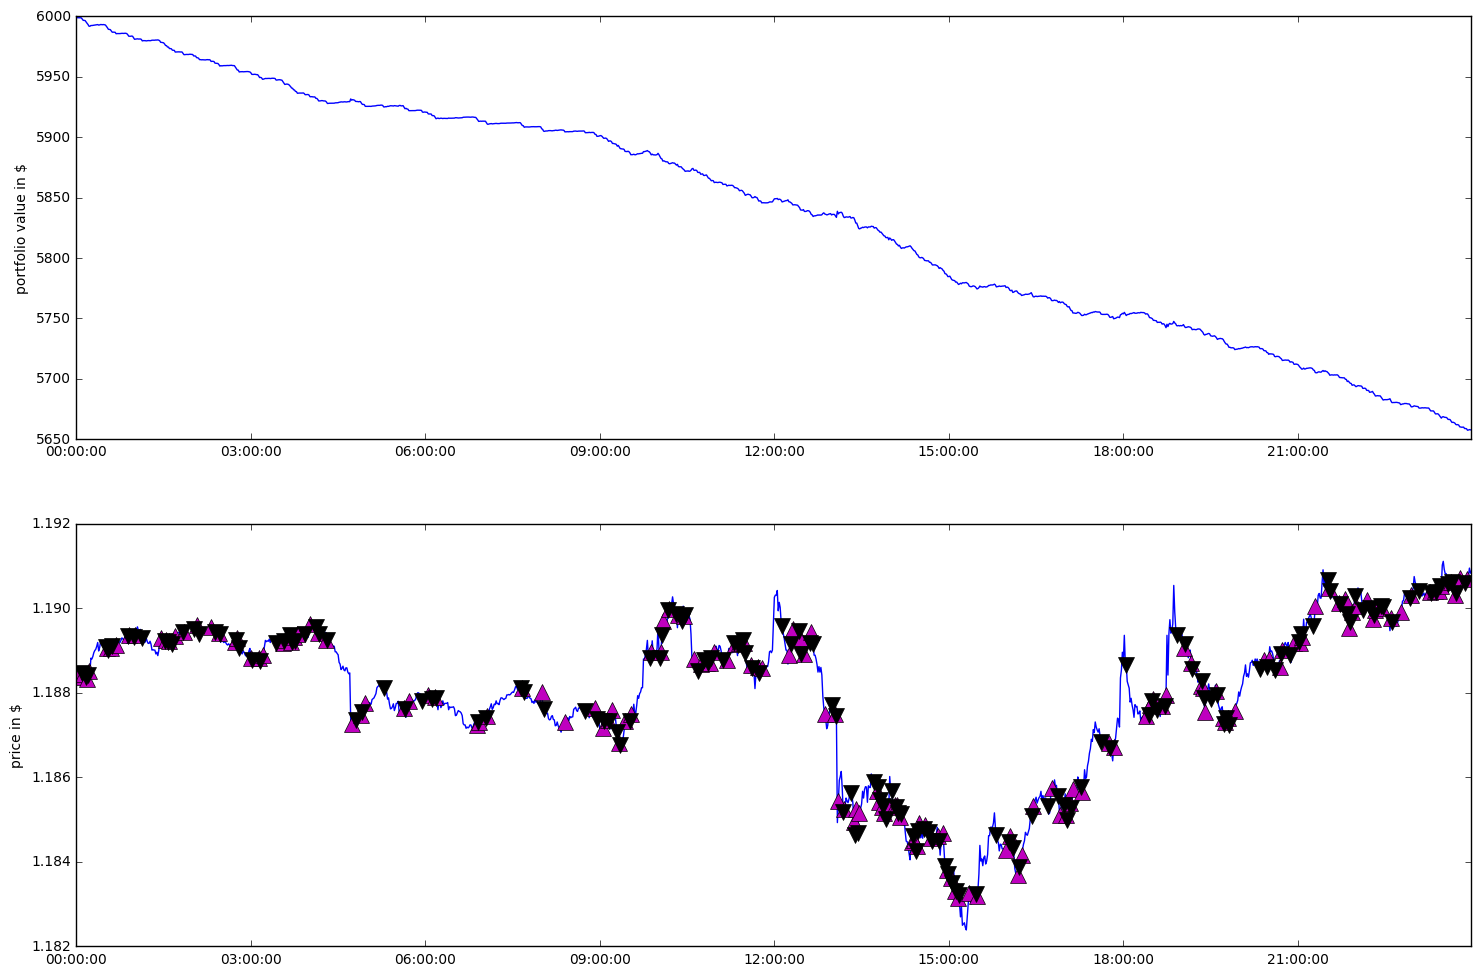

,EURUSD1,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2017-08-31 00:00:00+00:00,1.18831,0.000000,0.000000,0.000000e+00,0.006016,0.067530,0.000000,0.00,6000.00,0.00,...,0.00,0.00,0,NaN,6000.0,0.0,0.0,1,[],0.0212
2017-08-31 00:01:00+00:00,1.18837,0.001964,-0.000175,0.000000e+00,0.012068,0.135465,-0.014501,-1189.42,4810.58,1188.37,...,0.00,0.00,0,-11.224972,6000.0,0.0,0.0,1,"[{u'commission': None, u'amount': 1000, u'sid'...",0.0212
2017-08-31 00:02:00+00:00,1.18835,0.002002,-0.000178,0.000000e+00,0.018157,0.203810,-0.009822,-1189.42,4810.58,1188.35,...,0.00,0.00,0,-11.224972,6000.0,0.0,0.0,1,[],0.0212
2017-08-31 00:03:00+00:00,1.18835,0.002002,-0.000178,3.415237e-18,0.024282,0.272566,-0.007344,-1189.42,4810.58,1188.35,...,0.00,0.00,0,-11.224972,6000.0,0.0,0.0,1,[],0.0212
2017-08-31 00:04:00+00:00,1.18834,0.002020,-0.000180,0.000000e+00,0.030444,0.341735,-0.005912,-1189.42,4810.58,1188.34,...,0.00,0.00,0,-11.224972,6000.0,0.0,0.0,1,[],0.0212
2017-08-31 00:05:00+00:00,1.18828,0.002133,-0.000190,3.415237e-18,0.036643,0.411321,-0.005185,-1189.42,4810.58,1188.28,...,0.00,0.00,0,-11.224972,6000.0,0.0,0.0,1,[],0.0212
2017-08-31 00:06:00+00:00,1.18848,0.003910,-0.000348,0.000000e+00,0.042880,0.481325,-0.008123,2374.87,8374.87,-2376.96,...,-2376.96,-2376.96,1,-11.224972,6000.0,0.0,0.0,1,"[{u'commission': None, u'amount': -3000, u'sid...",0.0212
2017-08-31 00:07:00+00:00,1.18844,0.006005,-0.000535,0.000000e+00,0.049154,0.551750,-0.010884,-2380.09,3619.91,2376.88,...,0.00,0.00,0,-11.224972,6000.0,0.0,0.0,1,"[{u'commission': None, u'amount': 4000, u'sid'...",0.0212
2017-08-31 00:08:00+00:00,1.18839,0.006192,-0.000552,0.000000e+00,0.055466,0.622599,-0.009946,-2380.09,3619.91,2376.78,...,0.00,0.00,0,-11.224972,6000.0,0.0,0.0,1,[],0.0212
2017-08-31 00:09:00+00:00,1.18835,0.006342,-0.000565,0.000000e+00,0.061815,0.693874,-0.009140,-2380.09,3619.91,2376.70,...,0.00,0.00,0,-11.224972,6000.0,0.0,0.0,1,[],0.0212


In [3]:
%%zipline --start 2017-8-31 --end 2017-8-31 --bundle forex --data-frequency minute --capital-base 6000.0

import math
import numpy as np
import pandas as pd
import tensorflow as tf

from zipline.api import symbol, record, order, order_target, order_target_value
from zipline.utils.calendars import get_calendar

from util.ZigZag import ZigZag
from util.BuildData import BuildData4
from util.CalcReturns import CalcReturns

import matplotlib.pyplot as plt

data_lag = 61
default_volume = 1000

def initialize(context):
    context.i       = 0
    context.curpos  = 0
    context.curvol  = 0
    context.asset   = symbol('EURUSD1')
    context.session = tf.Session()
    context.saver = tf.train.import_meta_graph('data/fxnn.ckpt.meta')
    context.saver.restore(context.session, tf.train.latest_checkpoint('data/'))
        
    graph = tf.get_default_graph()
                
    context.x  = graph.get_tensor_by_name('x:0')        
    context.nn = graph.get_tensor_by_name('nn:0')    
    pass

def before_trading_start(context, data):
    pass

def handle_data(context, data):
    record(EURUSD1=data.current(context.asset, 'price'))
    frame = data.history(context.asset, 'price', bar_count=data_lag, frequency="1m").values
    
    r = np.array(CalcReturns(frame))    
    r = r.reshape(1, -1)
    
    p = context.session.run(tf.argmax(context.nn,1), feed_dict = {context.x:r})
    if p == 0:
        p = -1
        
    if context.curpos != p:
        tv = p * default_volume
        dv = tv - context.curvol
        
        context.curpos = p
        context.curvol = tv;
        
        order_target(context.asset, dv)
    
    pass
    
def analyze(context, perf):    
    fig = plt.figure()
    
    ax1 = fig.add_subplot(211)    
    ax1.plot(perf.portfolio_value.index, perf.portfolio_value.values)
    
    ax1.set_ylabel('portfolio value in $')    
    ax2 = fig.add_subplot(212)    
    
    ax2.plot(perf.EURUSD1.index, perf.EURUSD1.values)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    
    buys  = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
    
    ax2.plot(buys.index.values,  perf.EURUSD1.ix[buys.index].values, '^', markersize=11, color='m')
    ax2.plot(sells.index.values, perf.EURUSD1.ix[sells.index].values,'v', markersize=11, color='k')
    
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    
    plt.gcf().set_size_inches(18, 12)
    plt.legend(loc=0)
    plt.show()
    pass